# Model Selection

In [32]:
import pandas as pd
import seaborn as sns
import sklearn.metrics as m
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
def print_results(y_hat,y_pred,confusion=True):  
    if confusion:
        confusion = pd.crosstab(y_hat,y_pred)
        confusion.index.name,confusion.columns.name  = 'Observed','Predicted'
        print(confusion)
    accuracy  = m.accuracy_score(y_hat,y_pred)
    precision = m.recall_score(y_hat,y_pred,pos_label='readmitted')
    recall    = m.precision_score(y_hat,y_pred,pos_label='readmitted')
    print(f'\nAccuracy:\n\t{accuracy}\nPrecision:\n\t{precision}\nRecall:\n\t{recall}\n')
    return accuracy,precision,recall

## Data

In [3]:
X_train    = pd.read_csv('X_train.csv').drop('Unnamed: 0',axis=1)
y_train    = pd.read_csv('y_train.csv').readmitted
X_validate = pd.read_csv('X_validate.csv').drop('Unnamed: 0',axis=1)
y_validate = pd.read_csv('y_validate.csv').readmitted
X_test     = pd.read_csv('X_test.csv').drop('Unnamed: 0',axis=1)
y_test     = pd.read_csv('y_test.csv').readmitted

target_counts = y_train.value_counts()
priors = [t/len(y) for t in target_counts]
priors

[0.8877685402068903, 0.1122314597931097]

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest             = RandomForestClassifier(random_state=1984)
forest_fitted      = forest.fit(X_train,y_train)
y_train_predict    = forest_fitted.predict(X_train)
y_validate_predict = forest_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           70624           0
readmitted                   0       70624
Accuracy:
	 1.0
Recall:
	 1.0
Precision:
	 1.0

Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            7992         823
readmitted                 947         186
Accuracy:
	 0.8220747889022919
Recall:
	 0.1641659311562224
Precision:
	 0.18434093161546086


## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

g_bayes            = GaussianNB(priors=priors)
g_bayes_fitted     = g_bayes.fit(X_train,y_train)
y_train_predict    = g_bayes_fitted.predict(X_train)
y_validate_predict = g_bayes_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            8919       61705
readmitted                2423       68201
Accuracy:
	 0.5459900317172632
Recall:
	 0.9656915496148618
Precision:
	 0.5250026942558466

Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            1079        7736
readmitted                  99        1034
Accuracy:
	 0.21240450341777242
Recall:
	 0.912621359223301
Precision:
	 0.11790193842645381


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logit              = LogisticRegression()
logit_fitted       = logit.fit(X_train,y_train)
y_train_predict    = logit_fitted.predict(X_train)
y_validate_predict = logit_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           46311       24313
readmitted               25367       45257

Accuracy:
	0.6482782057091074
Precision:
	0.6408161531490711
Recall:
	0.6505246514302142


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            5713        3102
readmitted                 523         610

Accuracy:
	0.6356051467631685
Precision:
	0.5383936451897617
Recall:
	0.16433189655172414



(0.6356051467631685, 0.5383936451897617, 0.16433189655172414)

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn                = KNeighborsClassifier()
knn_fitted         = knn.fit(X_train,y_train)
y_train_predict    = knn_fitted.predict(X_train)
y_validate_predict = knn_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           40059       30565
readmitted                  10       70614
Accuracy:
	 0.7835367580425917
Recall:
	 0.9998584050747621
Precision:
	 0.6979116219768925

Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            3782        5033
readmitted                 365         768
Accuracy:
	 0.4573783675110575
Recall:
	 0.677846425419241
Precision:
	 0.1323909670746423


## Neural Net

In [14]:
from sklearn.neural_network import MLPClassifier

net                = MLPClassifier(hidden_layer_sizes=(100,100),
                                   verbose=True)
net_fitted         = net.fit(X_train,y_train)
y_train_predict    = net_fitted.predict(X_train)
y_validate_predict = net_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

Iteration 1, loss = 0.56251795
Iteration 2, loss = 0.40343615
Iteration 3, loss = 0.32525350
Iteration 4, loss = 0.28475227
Iteration 5, loss = 0.26094237
Iteration 6, loss = 0.24081850
Iteration 7, loss = 0.22635534
Iteration 8, loss = 0.21616960
Iteration 9, loss = 0.20554484
Iteration 10, loss = 0.19438236
Iteration 11, loss = 0.18871103
Iteration 12, loss = 0.18083432
Iteration 13, loss = 0.17489126
Iteration 14, loss = 0.16682328
Iteration 15, loss = 0.16235610
Iteration 16, loss = 0.15970699
Iteration 17, loss = 0.15255162
Iteration 18, loss = 0.14942780
Iteration 19, loss = 0.14421524
Iteration 20, loss = 0.14133495
Iteration 21, loss = 0.13721092
Iteration 22, loss = 0.13464266
Iteration 23, loss = 0.12958288
Iteration 24, loss = 0.12664661
Iteration 25, loss = 0.12401114
Iteration 26, loss = 0.12094586
Iteration 27, loss = 0.11641017
Iteration 28, loss = 0.11468142
Iteration 29, loss = 0.11367482
Iteration 30, loss = 0.10981891
Iteration 31, loss = 0.10918029
Iteration 32, los

## ROC Curves

Text(0.5, 1.0, 'ROC Curve')

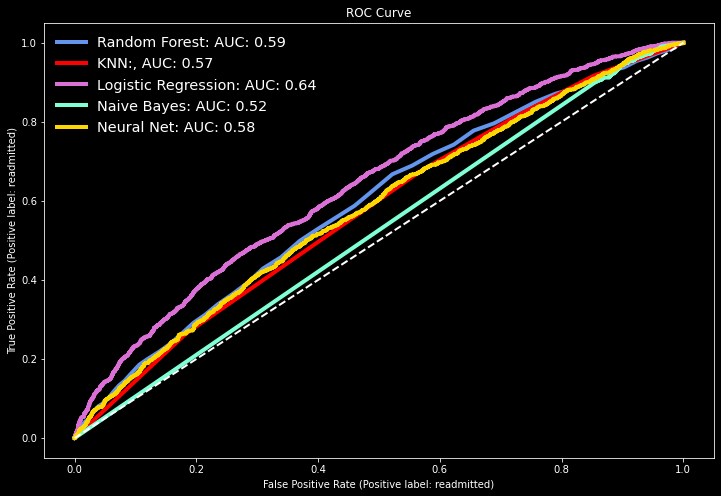

In [27]:
plt.style.use('dark_background')

forest_auc = m.roc_auc_score(y_validate, forest_fitted.predict_proba(X_validate)[:,1])
knn_auc    = m.roc_auc_score(y_validate, knn_fitted.predict_proba(X_validate)[:,1])
log_auc    = m.roc_auc_score(y_validate, logit_fitted.predict_proba(X_validate)[:,1])
bayes_auc  = m.roc_auc_score(y_validate, g_bayes_fitted.predict_proba(X_validate)[:,1])
net_auc    = m.roc_auc_score(y_validate, net_fitted.predict_proba(X_validate)[:,1])


fig,ax = plt.subplots(figsize =(12,8))
m.plot_roc_curve(forest_fitted, 
                 X_validate, 
                 y_validate,
                 label=f'Random Forest: AUC: {round(forest_auc,2)}',
                 lw=4,
                 color='cornflowerblue',
                 ax=ax)

m.plot_roc_curve(knn_fitted, 
                 X_validate, 
                 y_validate,
                 label=f'KNN:, AUC: {round(knn_auc,2)}',
                 lw=4,
                 color='red',
                 ax=ax)

m.plot_roc_curve(logit_fitted, 
                 X_validate, 
                 y_validate,
                 label=f'Logistic Regression: AUC: {round(log_auc,2)}',
                 lw=4,
                 color='orchid',
                 ax=ax)

m.plot_roc_curve(g_bayes_fitted, 
                 X_validate, 
                 y_validate,
                 label=f'Naive Bayes: AUC: {round(bayes_auc,2)}',
                 lw=4,
                 color='aquamarine',
                 ax=ax)

m.plot_roc_curve(net_fitted, 
                 X_validate, 
                 y_validate,
                 label=f'Neural Net: AUC: {round(net_auc,2)}',
                 lw=4,
                 color='gold',
                 ax=ax)

plt.plot([0, 1], 
         [0, 1], 
         color='white', 
         lw=2, 
         linestyle='--')

plt.legend(frameon=False,fontsize='x-large')
plt.title('ROC Curve')

In [42]:
f_map = {'number_inpatient'          :'Inpatient Visits Prior',
         'weight'                    :'Weight',
         'gender_male'               :'Male',
         'age'                       :'Age',
         'race_Caucasian'            :'Caucasian',
         'time_in_hospital'          :'Length of Stay',
         'diag_2_heart_dx_other'     :'2\N{DEGREE SIGN} Dx: Heart Disease (other)',
         'admission_source_id_7'     :'Trauma Admission',
         'num_medications'           :'Number of Distinct Meds',
         'lab_procedures_per_day'    :'Labs per Day',
         'medications_per_day'       :'Meds per Day',
         'num_lab_procedure'         :'Number of Labs',
         'number_diagnoses'          :'Number of Diagnoses',
         'num_procedure'             :'Number of Procedures',
         'procedures_per_day'        :'Procedure per Day',
         'discharge_disposition_id_3':'D/C to SNF',
         'diag_3_diabetes'           :'3\N{DEGREE SIGN} Dx: DM',
         'medical_specialty_medicine':'Managed by Medicine',
         'payer_code_none'           :'No Payer Code',
         'discharge_disposition_id_6':'D/C Disposition Missing'}

[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Random Forest Feature Importance')]

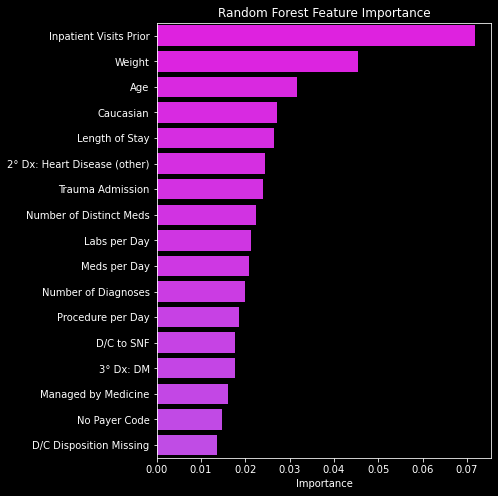

In [51]:
importance = pd.DataFrame({'feature':X_train.columns,
                           'importance':forest_fitted.feature_importances_}).\
                          sort_values(by='importance').tail(100).\
                          sort_values(by='importance',ascending=False) 
# (Trying sort descending with initial sort_values has long runtime)

fig, ax = plt.subplots(figsize=(6,8))

p = sns.barplot(y=importance.feature.map(f_map),
                x=importance.importance,
                hue=importance.importance,
                palette='cool',
                dodge=False)
plt.legend([],[], frameon=False)
ax.set(xlabel='Importance',
       ylabel='',
       title='Random Forest Feature Importance')

In [50]:
importance = pd.DataFrame({'feature':X_train.columns,
                           'importance':forest_fitted.feature_importances_}).\
                          sort_values(by='importance').feature.iloc[::-1]
importance.to_csv('importance.csv')

In [52]:
importance

,feature,importance
8,number_inpatient,0.071898
1,weight,0.045387
17,gender_Male,0.036269
0,age,0.031721
14,race_Caucasian,0.027169
...,...,...
87,medical_specialty_neurology,0.001711
126,diag_1_neph_dx,0.001709
160,diag_2_heme_anemia,0.001695
297,renal_1,0.001675
